In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('Copy of DBS_Data_Samples2.xlsx',usecols=[2,3,4],sheet_name='60 sec AdultF vs AdultM')

In [9]:
data.head()

,Time (sec),AdultF,AdultM1
0,0.050008,8.277837,8.278923
1,0.101987,8.277797,8.278915
2,0.152994,8.277790,8.278915
3,0.203008,8.277814,8.278915
4,0.255057,8.277814,8.278938


In [77]:
1/0.054

18.51851851851852

In [143]:
def plot_fft(data=data.AdultF.values,fs=1/0.054,name='None'):
    mag_fft = np.abs(np.fft.fft(data))
    num_dots = len(data)
    half_num = int(num_dots/2)
    base_freq = fs/num_dots
#     ## frequency plot
#     plt.figure(0)
#     freqs = np.linspace(0,fs,num_dots)
#     plt.plot([2:half_num],mag_fft[2:half_num])
    
    
    # detecting respiration rate from 10 events/min (get rid of 0hz and some noise)
    res_sp = int(np.ceil(10/(base_freq*60)))
    # detecting heart rate from 40 events/min (get rid of respiration rate and some noise)
    hr_sp = int(np.ceil(40/(base_freq*60)))
    # plot point
    pl_sp = int(np.ceil(4/(base_freq*60)))
    
    ## event plot
    freqs = np.linspace(0,fs,num_dots)
    plt.figure(1)
    plt.plot(60*freqs[pl_sp:half_num],mag_fft[pl_sp:half_num])
    plt.title(name)
    plt.show()
    
    
    
    res_rate = (mag_fft[res_sp:half_num].argmax()+res_sp)*base_freq*60
    heart_rate = (mag_fft[hr_sp:half_num].argmax()+hr_sp)*base_freq*60
    print ('Normal Respiration Rate: 12-25 breaths/min')
    print('Respiration Rate:{}'.format(res_rate))
    print ('Normal Heart Rate: 60-100 beats/min')
    print('Heart Rate:{}'.format(heart_rate))

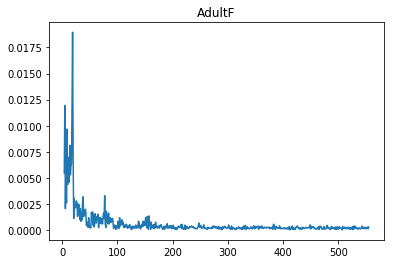

Normal Respiration Rate: 12-25 breaths/min
Respiration Rate:19.01901901901902
Normal Heart Rate: 60-100 beats/min
Heart Rate:77.07707707707709


In [144]:
plot_fft(data=data.AdultF.values,name='AdultF')

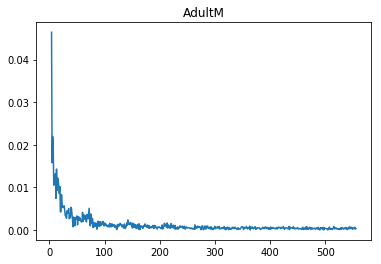

Normal Respiration Rate: 12-25 breaths/min
Respiration Rate:13.013013013013014
Normal Heart Rate: 60-100 beats/min
Heart Rate:72.07207207207209


In [145]:
plot_fft(data=data.AdultM1.values,name='AdultM')

In [106]:
###### Test using another sheet
data2 = pd.read_excel('Copy of DBS_Data_Samples2.xlsx',usecols=[2,3,4],sheet_name='60 sec ChildF vs AdultM')

In [108]:
data2.head()

,Time (sec),ChildF1,AdultM3
0,0.006392,8.278412,8.276714
1,0.007538,8.278412,8.276714
2,0.007617,8.278412,8.276714
3,0.009075,8.278412,8.276714
4,0.011206,8.278412,8.276714


In [115]:
data2.iloc[:,0].diff().mean()

0.002593457762679185

In [116]:
fs = 1/data2.iloc[:,0].diff().mean()

In [121]:
fs*60/2

11567.568375977076

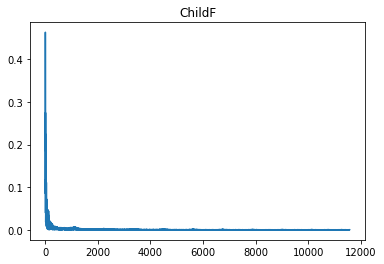

Normal Respiration Rate: 12-25 breaths/min
Respiration Rate:13.962062010835336
Normal Heart Rate: 60-100 beats/min
Heart Rate:45.87534660703039


In [130]:
plot_fft(data=data2.ChildF1.values,fs=fs,name='ChildF')

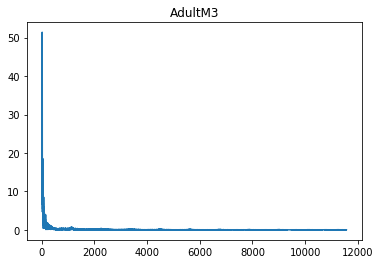

Normal Respiration Rate: 12-25 breaths/min
Respiration Rate:16.95393244172862
Normal Heart Rate: 60-100 beats/min
Heart Rate:53.85366775607915


In [131]:
plot_fft(data=data2.AdultM3.values,fs=fs,name='AdultM3')

It seems heart rate detecting is still having some issues sometimes.
Need some adjustment.